# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [10]:
if not os.path.exists('data'):
os.makedirs('data')

In [32]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


'\nbase_url = "https://www.airlinequality.com/airline-reviews/british-airways"\npages = 10\npage_size = 100\n\nreviews = []\n\n# for i in range(1, pages + 1):\nfor i in range(1, pages + 1):\n\n    print(f"Scraping page {i}")\n\n    # Create URL to collect links from paginated data\n    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"\n\n    # Collect HTML data from this page\n    response = requests.get(url)\n\n    # Parse content\n    content = response.content\n    parsed_content = BeautifulSoup(content, \'html.parser\')\n    for para in parsed_content.find_all("div", {"class": "text_content"}):\n        reviews.append(para.get_text())\n    \n    print(f"   ---> {len(reviews)} total reviews")\n\n'

In [41]:
df = pd.DataFrame()
df["reviews"] = reviews
df.to_csv("data/BA_reviews.csv", index=False)
print(df.head())

                                             reviews
0  ✅ Trip Verified | Absolutely atrocious. LHR-OR...
1  ✅ Trip Verified | As someone who flies relentl...
2  ✅ Trip Verified |   Flew with British Airways ...
3  ✅ Trip Verified |   Straightforward check in T...
4  Not Verified | I am beyond upset and disgusted...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

2. Data Cleaning

In [43]:
import re
def clean_review(text):
    cleaned_text = re.sub(r'✅ Trip Verified', '', text)
    cleaned_text = cleaned_text.strip()  
    return cleaned_text
df['cleaned_reviews'] = df['reviews'].apply(clean_review)
df['cleaned_reviews'] = df['cleaned_reviews'].str.lower()
print(df['cleaned_reviews'].head())


0    | absolutely atrocious. lhr-ord-lhr round-trip...
1    | as someone who flies relentlessly with briti...
2    |   flew with british airways club europe on s...
3    |   straightforward check in t5. new site for ...
4    not verified | i am beyond upset and disgusted...
Name: cleaned_reviews, dtype: object


'\nimport re\n\n# Clean reviews by removing unwanted text such as "✅ Trip Verified"\ndef clean_review(text):\n    # Remove "Trip Verified" or similar irrelevant text\n    cleaned_text = re.sub(r\'✅ Trip Verified\', \'\', text)\n    \n    # Add other cleaning rules here if needed, e.g. removing extra spaces or special characters\n    cleaned_text = cleaned_text.strip()  # Remove leading/trailing spaces\n    return cleaned_text\n\n# Apply the cleaning function to all reviews\ndf[\'cleaned_reviews\'] = df[\'reviews\'].apply(clean_review)\n\n# Show cleaned reviews\ndf[\'cleaned_reviews\'].head()\n'

3. Sentiment Analysis

In [47]:
!pip install TextBlob

In [46]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)
print(df[['cleaned_reviews', 'sentiment']].head())

                                     cleaned_reviews  sentiment
0  | absolutely atrocious. lhr-ord-lhr round-trip...  -0.084532
1  | as someone who flies relentlessly with briti...  -0.106250
2  |   flew with british airways club europe on s...  -0.073958
3  |   straightforward check in t5. new site for ...   0.213054
4  not verified | i am beyond upset and disgusted...  -0.000682


4. Visualizations

In [48]:
!pip install wordcloud

a. Word Cloud

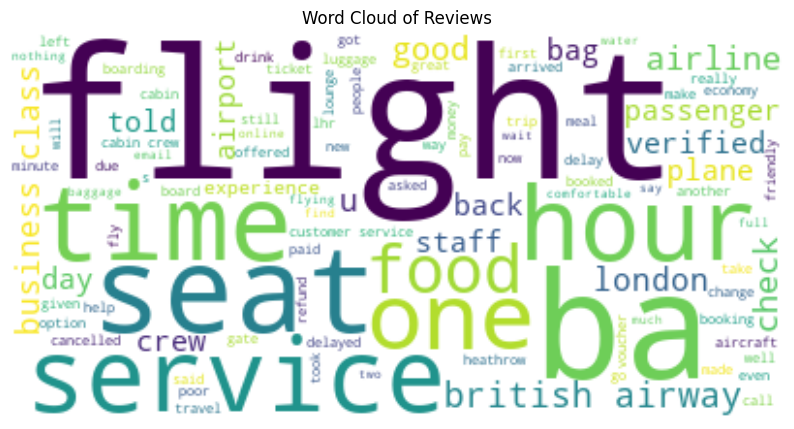

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df['cleaned_reviews'])
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Reviews')
plt.show()

b. Histogram of Sentiment Scores

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


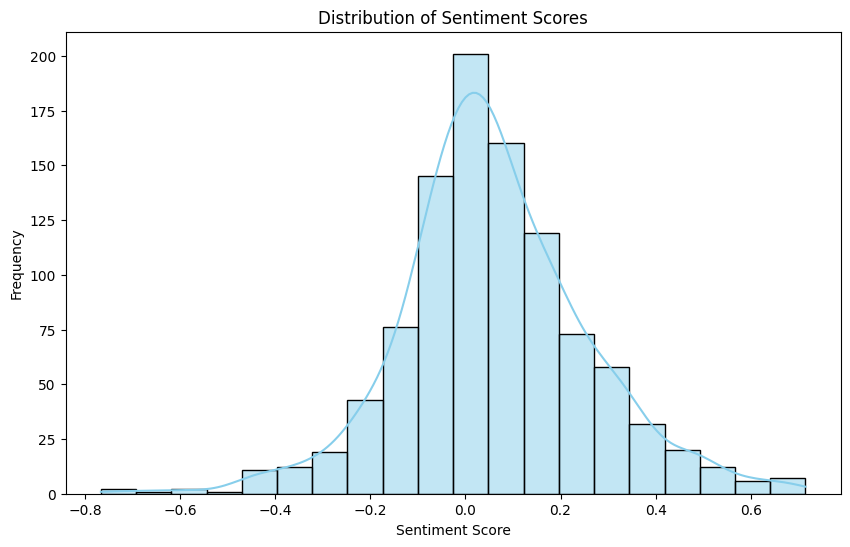

In [50]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


c. Top 10 Most Frequent Words


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


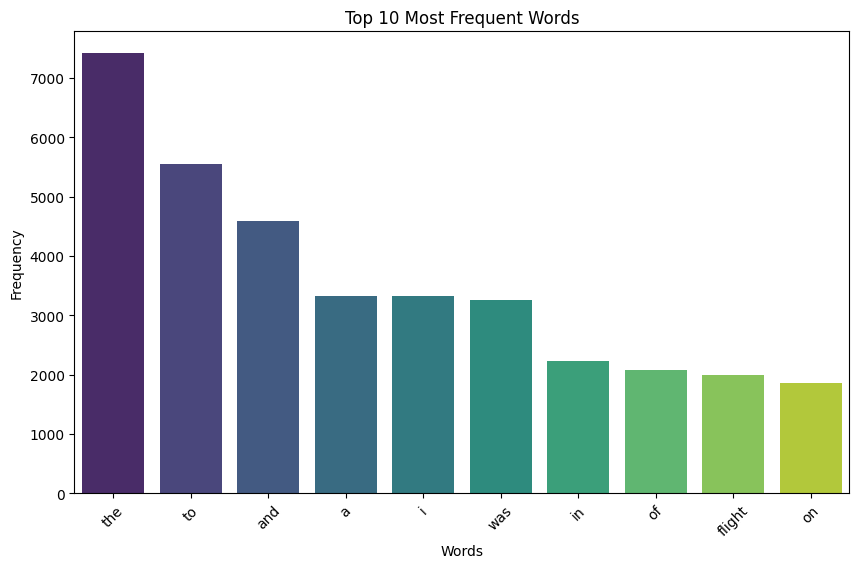

In [51]:
from collections import Counter
import re

all_words = " ".join(df['cleaned_reviews'])
words = re.findall(r'\w+', all_words)
word_freq = Counter(words)

common_words = word_freq.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


d. Sentiment Score vs Review Length

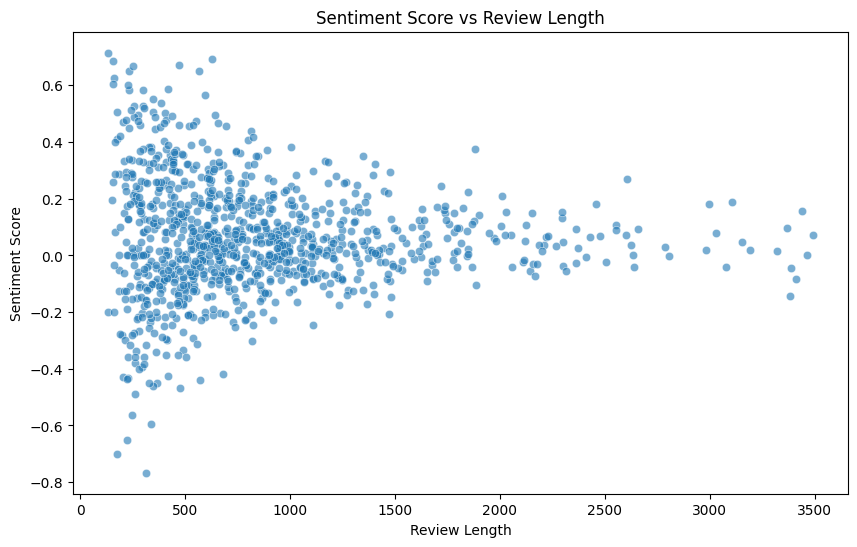

In [52]:
df['review_length'] = df['cleaned_reviews'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='sentiment', data=df, alpha=0.6)
plt.title('Sentiment Score vs Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()


e.  Pie Chart of Sentiment Distribution

In [54]:
print(df['sentiment_category'].value_counts())


sentiment_category
Neutral     477
Positive    360
Negative    163
Name: count, dtype: int64


In [56]:
%matplotlib inline


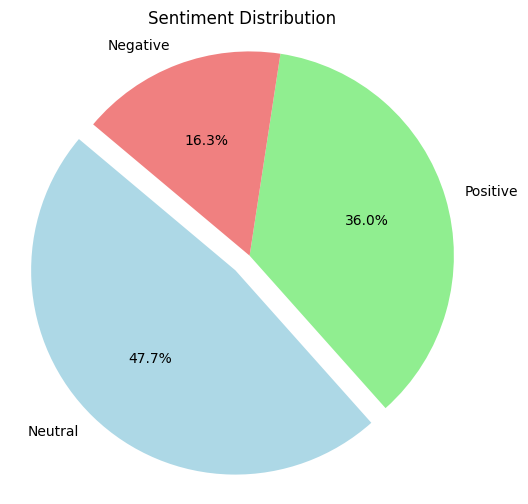

In [65]:
import matplotlib.pyplot as plt

labels = ['Neutral', 'Positive', 'Negative']
sizes = [477, 360, 163]
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0))
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()
